<a href="https://colab.research.google.com/github/AlexanderSychev2005/stat_un/blob/main/statistics_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [173]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

In [174]:
intervals = [(20, 21), (21, 22), (22, 23), (23, 24), (24, 25), (25, 26), (26, 27), (27, 28)]
frequencies = [10, 8, 7, 10, 22, 18, 14, 11]

In [175]:
n = sum(frequencies) # Загальна кількість спостережень: n = 100
alpha = 0.05 # Рівень значущості
k = 8

In [176]:
# 1. Знайдемо середини інтервалів
midpoints = np.mean(intervals, axis=1)
midpoints

array([20.5, 21.5, 22.5, 23.5, 24.5, 25.5, 26.5, 27.5])

In [177]:
# 2. Створимо масив даних, розгорнувши частоти в повний набір значень
data = np.repeat(midpoints, frequencies)
data

array([20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 20.5, 21.5,
       21.5, 21.5, 21.5, 21.5, 21.5, 21.5, 21.5, 22.5, 22.5, 22.5, 22.5,
       22.5, 22.5, 22.5, 23.5, 23.5, 23.5, 23.5, 23.5, 23.5, 23.5, 23.5,
       23.5, 23.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5,
       24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5, 24.5,
       24.5, 24.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5,
       25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 25.5, 26.5, 26.5,
       26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5, 26.5,
       26.5, 27.5, 27.5, 27.5, 27.5, 27.5, 27.5, 27.5, 27.5, 27.5, 27.5,
       27.5])

In [178]:
# 3. Оцінимо параметри нормального розподілу (математичне сподівання і дисперсію)
mu = np.mean(data)  # Вибіркове середнє (математичне сподівання)
sigma = np.std(data, ddof=1)  # Вибіркове стандартне відхилення (з поправкою на n-1)
print(f"Mean: {mu}, Standard deviation: {sigma}")

Mean: 24.41, Standard deviation: 2.11342510077023


## 4. Критерій Пірсона (χ²)
## Обчислимо теоретичні ймовірності для нормального розподілу

In [202]:
# 4. Критерій Пірсона (χ²)
# Визначаємо інтервали для критерію Пірсона з урахуванням -∞ та +∞
intervals_for_pearson = [
    (float('-inf'), 21),
    (21, 22),
    (22, 23),
    (23, 24),
    (24, 25),
    (25, 26),
    (26, 27),
    (27, float('inf'))
]

In [205]:
# Обчислюємо теоретичні ймовірності для нормального розподілу
probs = []
for a, b in intervals_for_pearson:
    prob = stats.norm.cdf(b, mu, sigma) - stats.norm.cdf(a, mu, sigma)
    probs.append(prob)

In [206]:
# Обчислюємо очікувані частоти: n_i' = p_i * n
expected = np.array(probs) * n

In [207]:
# Створюємо таблицю для критерію Пірсона
frame = pd.DataFrame({
    "Intervals": [f"({a}, {b})" for a, b in intervals_for_pearson],
    "Pi": probs,
    "ni'": expected
})
frame

,Intervals,Pi,ni'
0,"(-inf, 21)",0.053319,5.331855
1,"(21, 22)",0.073756,7.375608
2,"(22, 23)",0.125259,12.525924
3,"(23, 24)",0.170755,17.075490
4,"(24, 25)",0.186853,18.685316
5,"(25, 26)",0.164133,16.413273
6,"(26, 27)",0.115732,11.573167
7,"(27, inf)",0.110194,11.019366


In [208]:
# Перевіряємо, що сума ймовірностей дорівнює 1
np.sum(frame["Pi"])

np.float64(1.0)

In [209]:
np.sum(frame["ni'"])

np.float64(100.0)

In [185]:
# Обчислимо статистику χ²
chi2_stat = np.sum((frequencies - expected) ** 2 / expected)
chi2_stat

np.float64(10.759893198625697)

In [186]:
r = len(intervals)  # Кількість інтервалів
l = 2  # Кількість параметрів, оцінених з вибірки (середнє та дисперсія)
k = r - l - 1  # Число ступенів свободи



In [187]:
import scipy

In [210]:
# Знаходимо критичне значення χ²
chi_square_critical = scipy.stats.chi2.ppf(1-alpha, k)

print("\nКритерій Пірсона:")
print(f"χ²_спост²: {chi2_stat:.4f}")
print(f"Ступені свободи: {k}")
print(f"χ²_кр²: {chi_square_critical:.4f}")


Критерій Пірсона:
χ²_спост²: 10.7599
Ступені свободи: 5
χ²_кр²: 11.0705


In [189]:
if chi2_stat > chi_square_critical:
    print(f"Оскільки χ²_спост > χ²_кр ({chi2_stat:.4f} > {chi_square_critical:.4f}), на рівні значущості α = {alpha} є підстави відхиляти гіпотезу H_0 про те, що випадкова величина X має нормальний закон розподілу.")
else:
    print(f"Оскільки χ²_спост < χ²_кр ({chi2_stat:.4f} < {chi_square_critical:.4f}), на рівні значущості α = {alpha} немає підстав відхиляти гіпотезу H_0 про те, що випадкова величина X має нормальний закон розподілу.")

Оскільки χ²_спост < χ²_кр (10.7599 < 11.0705), на рівні значущості α = 0.05 немає підстав відхиляти гіпотезу H_0 про те, що випадкова величина X має нормальний закон розподілу.


## КРИТЕРІЙ КОЛМОГОРОВА

In [211]:
# 5. Критерій Колмогорова
# Формуємо таблицю для критерію Колмогорова
x_i_list = [-float('inf')] + [interval[0] for interval in intervals] + [intervals[-1][1]]
x_i_plus_1_list = [intervals[0][0]] + [pair[1] for pair in intervals] + [float('inf')]
frequencies_extended = [0] + frequencies + [0]  # Додаємо 0 на початку і в кінці
m_x_extended = pd.Series(frequencies_extended).cumsum() # Кумулятивні частоти

In [212]:
x_i_list

[-inf, 20, 21, 22, 23, 24, 25, 26, 27, 28]

In [213]:
x_i_plus_1_list

[20, 21, 22, 23, 24, 25, 26, 27, 28, inf]

In [214]:
frequencies_extended

[0, 10, 8, 7, 10, 22, 18, 14, 11, 0]

In [194]:
import math

In [215]:
# Кумулятивна частота (F*(x_i))
kolmogorov_table_data = {
    'i': list(range(1, len(x_i_list) + 1)),
    'x_i': x_i_list,
    'x_{i+1}': x_i_plus_1_list,
    'm_i': frequencies_extended,
    'm_x': m_x_extended,
    'F*(x_i)': m_x_extended / n, # Емпірична функція розподілу
}
kolmogorov_df = pd.DataFrame(kolmogorov_table_data)
kolmogorov_df.loc[kolmogorov_df.index[-1], 'F*(x_i)'] = 1

# Обчислюємо теоретичну функцію розподілу F(x_i) для нормального закону
kolmogorov_df['(x_{i+1}-mu)/sigma'] = (kolmogorov_df['x_{i+1}'] - mu) / sigma
kolmogorov_df['F(x_i)'] = [scipy.stats.norm.cdf(z) if z != float('inf') else 1 for z in kolmogorov_df['(x_{i+1}-mu)/sigma']]
kolmogorov_df.loc[0, 'F(x_i)'] = 0  # для -inf

# Обчислюємо абсолютну різницю між емпіричною та теоретичною функціями
kolmogorov_df['|F*(x_i) - F(x_i)|'] = abs(kolmogorov_df['F*(x_i)'] - kolmogorov_df['F(x_i)'])

# Форматування для зручного перегляду
kolmogorov_df['F*(x_i)'] = kolmogorov_df['F*(x_i)'].apply(lambda x: f"{x:.3f}")
kolmogorov_df['(x_{i+1}-mu)/sigma'] = kolmogorov_df['(x_{i+1}-mu)/sigma'].apply(lambda x: f"{x:.4f}" if x != float('inf') else 'inf')
kolmogorov_df['F(x_i)'] = kolmogorov_df['F(x_i)'].apply(lambda x: f"{x:.4f}")
kolmogorov_df['|F*(x_i) - F(x_i)|'] = kolmogorov_df['|F*(x_i) - F(x_i)|'].apply(lambda x: f"{x:.5f}")

In [216]:
kolmogorov_df

,i,x_i,x_{i+1},m_i,m_x,F*(x_i),(x_{i+1}-mu)/sigma,F(x_i),|F*(x_i) - F(x_i)|
0,1,-inf,20.0,0,0,0.000,-2.0867,0.0000,0.00000
1,2,20.0,21.0,10,10,0.100,-1.6135,0.0533,0.04668
2,3,21.0,22.0,8,18,0.180,-1.1403,0.1271,0.05293
3,4,22.0,23.0,7,25,0.250,-0.6672,0.2523,0.00233
4,5,23.0,24.0,10,35,0.350,-0.1940,0.4231,0.07309
5,6,24.0,25.0,22,57,0.570,0.2792,0.6099,0.03994
6,7,25.0,26.0,18,75,0.750,0.7523,0.7741,0.02407
7,8,26.0,27.0,14,89,0.890,1.2255,0.8898,0.00019
8,9,27.0,28.0,11,100,1.000,1.6987,0.9553,0.04469
9,10,28.0,inf,0,100,1.000,inf,1.0000,0.00000


In [217]:
# Обчислюємо D*, λ_спост і λ_крит
D_star = kolmogorov_df['|F*(x_i) - F(x_i)|'].astype(float).max()
λ = D_star * math.sqrt(n)
alpha = 0.05
λ_kr = scipy.stats.kstwobign.ppf(1 - alpha)

print(f"\nD* = {D_star:.5f}")
print(f"λ_спост = {λ:.4f}")
print(f"λ_крит (α = {alpha}) = {λ_kr:.3f}")


D* = 0.07309
λ_спост = 0.7309
λ_крит (α = 0.05) = 1.358


In [198]:
print(f"Для заданого рівня значущості alpha = {alpha} знаходимо λ_крит = λ_{alpha} = {λ_kr:.3f}")
if λ > λ_kr:
    print(f"А) Оскільки λ_спост > λ_кр ({λ:.4f} > {λ_kr:.3f}), на рівні значущості α = {alpha} є підстави відхиляти гіпотезу H_0 про те, що випадкова величина X має нормальний закон розподілу.\n")
else:
    print(f"А) Оскільки λ_спост < λ_кр ({λ:.4f} < {λ_kr:.3f}), на рівні значущості α = {alpha} немає підстав відхиляти гіпотезу H_0 про те, що випадкова величина X має нормальний закон розподілу.\n")

Для заданого рівня значущості alpha = 0.05 знаходимо λ_крит = λ_0.05 = 1.358
А) Оскільки λ_спост < λ_кр (0.7309 < 1.358), на рівні значущості α = 0.05 немає підстав відхиляти гіпотезу H_0 про те, що випадкова величина X має нормальний закон розподілу.



In [199]:
# Обчислення критичного значення K(n;alpha) для статистики критерію Колмогорова
k_n_alpha = λ_kr / math.sqrt(n)
print(f"K_{n}_{alpha} = {k_n_alpha:.3f}")

if D_star > k_n_alpha:
    print(f"В) Оскільки D* > K_{n}_{alpha} ({D_star:.4f} > {k_n_alpha:.3f}), на рівні значущості α = {alpha} є підстави відхиляти гіпотезу H_0 про те, що випадкова величина X має нормальний закон розподілу.\n")
else:
    print(f"В) Оскільки D* < K_{n}_{alpha} ({D_star:.4f} < {k_n_alpha:.3f}), на рівні значущості α = {alpha} немає підстав відхиляти гіпотезу H_0 про те, що випадкова величина X має нормальний закон розподілу.\n")

K_100_0.05 = 0.136
В) Оскільки D* < K_100_0.05 (0.0731 < 0.136), на рівні значущості α = 0.05 немає підстав відхиляти гіпотезу H_0 про те, що випадкова величина X має нормальний закон розподілу.



In [200]:
import seaborn as sns

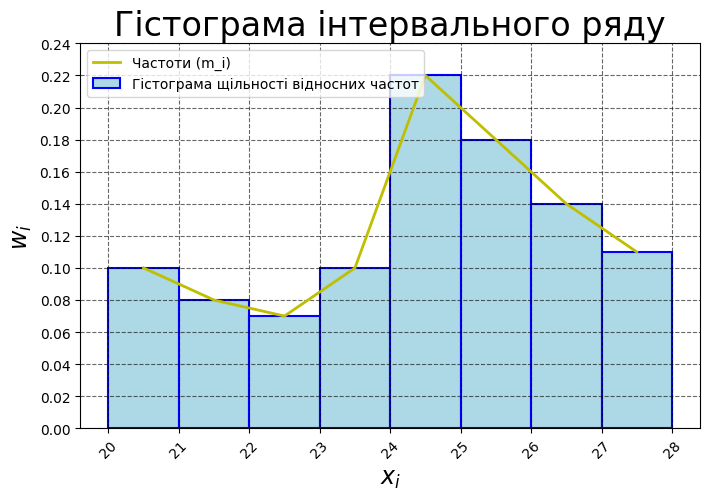

In [219]:
# 6 Візуалізація: Гістограма з нормальною кривою
bins = np.array([interval[0] for interval in intervals] + [intervals[-1][1]])
relative_frequencies = [frequency / n for frequency in frequencies]
h = bins[1] - bins[0]
density_w = [w / h for w in relative_frequencies]
midpoints = np.mean(intervals, axis=1)

plt.figure(figsize=(8, 5))
sns.histplot(data=data, bins=bins, stat="density", color="lightblue", edgecolor="blue", linewidth=1.5,
             alpha=1, label="Гістограма щільності відносних частот")
plt.plot(midpoints, density_w, 'y-', label='Частоти (m_i)', zorder=3, linewidth=2, markersize=6)

# Налаштування осей
plt.xticks(bins, rotation=45)
plt.xlabel("$x_i$", fontsize=17)
plt.ylabel("$w_i$", fontsize=17)
plt.title("Гістограма інтервального ряду", fontsize=24)
plt.yticks(np.arange(0, 0.26, 0.02))
plt.grid(True, linestyle='--', alpha=0.6, color='black', zorder=0)
plt.legend()

# Відображення гістограми
plt.show()

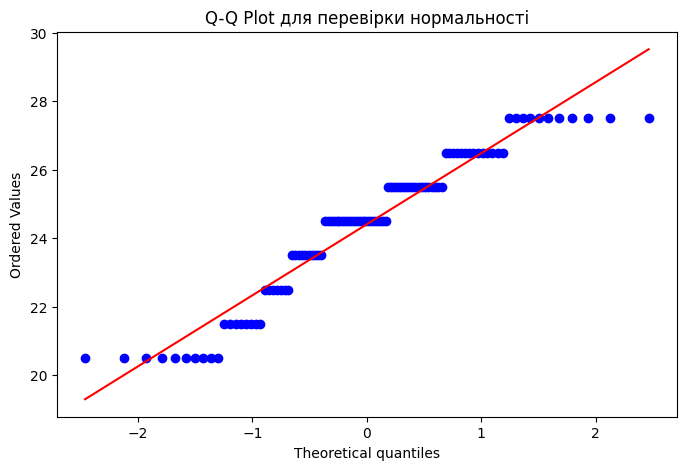

In [221]:
# 7. Q-Q Plot для перевірки нормальності
plt.figure(figsize=(8, 5))
stats.probplot(data, dist="norm", plot=plt)
plt.title("Q-Q Plot для перевірки нормальності")
plt.show()